<a href="https://colab.research.google.com/github/akhilkapil/ANN-SLP-For-Multi-Classification/blob/master/Credit_card_Fraud_detection_ANN_%2B_SMOTE_%2B_Undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/My Drive/Data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#Lets scale the other values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data['time_scaled'] = sc.fit_transform(data['Time'].values.reshape(-1,1))
data['amount_scaled'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace =True)

scaled_time = data['time_scaled']
scaled_amount = data['amount_scaled']

data.drop(['time_scaled','amount_scaled'], axis=1, inplace=True)
data.insert(0, 'scaled_time', scaled_time)
data.insert(1, 'scaled_amount', scaled_amount)

In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

In [9]:
from sklearn.model_selection import StratifiedKFold

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import sklearn

In [13]:
over_sampling =SMOTE(sampling_strategy=0.1)
under_sampling = RandomUnderSampler(sampling_strategy=0.5)
pipeline = Pipeline(steps=[('o', over_sampling),('u', under_sampling)])

X_sampled , y_sampled = pipeline.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
X_sampled

array([[-0.76612642,  0.07056774,  1.19673793, ...,  1.03284   ,
        -0.08842794,  0.00826653],
       [ 1.25802438, -0.3212447 , -0.82305131, ..., -0.35584307,
         0.37752795,  0.08407692],
       [-1.25523882,  1.80573715, -2.31140777, ...,  0.51532685,
        -1.63404669, -0.76549167],
       ...,
       [-1.25820111, -0.15966416,  0.35639596, ..., -0.24129074,
         0.46737561, -0.01403456],
       [-1.26020774, -0.35322939,  0.06725929, ..., -0.12286743,
         0.56939425,  0.30016592],
       [-0.05492965, -0.32517312, -2.39631179, ..., -0.68511272,
        -0.14794148, -0.13645636]])

In [23]:
pca = sklearn.decomposition.PCA(n_components=2)
p = pca.fit(X_sampled)

In [61]:
from sklearn.model_selection import StratifiedKFold

In [62]:
skf = StratifiedKFold(n_splits=3, random_state=40, shuffle=False)

for train_indices, test_indices in skf.split(X_sampled,y_sampled):
    print('Train :', train_indices, 'Test:', test_indices)
    X_train , X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train , y_test = y.iloc[train_indices], y.iloc[test_indices]

X_train.values
X_test.values
y_train.values
y_test.values
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())


Train : [18954 18955 18956 ... 85290 85291 85292] Test: [    0     1     2 ... 66336 66337 66338]
Train : [    0     1     2 ... 85290 85291 85292] Test: [18954 18955 18956 ... 75813 75814 75815]
Train : [    0     1     2 ... 75813 75814 75815] Test: [37908 37909 37910 ... 85290 85291 85292]
(56862, 30)
(28431, 30)
0    56732
1      130
Name: Class, dtype: int64
0    28357
1       74
Name: Class, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, ReLU, PReLU
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.activations import sigmoid, relu
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [72]:
classifier = Sequential()
classifier.add(Dense(20, activation='relu', kernel_initializer='uniform', input_dim=30))
classifier.add(Dropout(0.2)) 
classifier.add(Dense(64, activation='relu', kernel_initializer='uniform'))
classifier.add(Dense(64, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(0.2))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 6,189
Trainable params: 6,189
Non-trainable params: 0
____________________________________________________

In [73]:
import tensorflow as tf

In [77]:
call_back = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=256, epochs=100, callbacks=[call_back])

Epoch 1/100
149/149 [==============================] - 1s 5ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0184 - val_accuracy: 0.9993
Epoch 2/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.0139 - val_accuracy: 0.9993
Epoch 3/100
149/149 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.0149 - val_accuracy: 0.9993
Epoch 4/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 0.0145 - val_accuracy: 0.9994
Epoch 5/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.0151 - val_accuracy: 0.9993
Epoch 6/100
149/149 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 0.0160 - val_accuracy: 0.9994
Epoch 7/100
149/149 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 0.0163 - val_accuracy: 0.9994

In [78]:
predict = classifier.predict(X_test)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


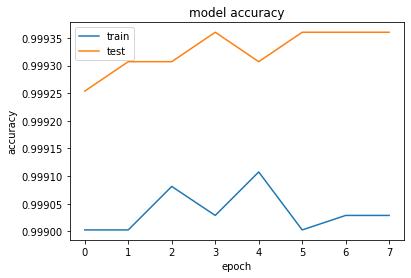

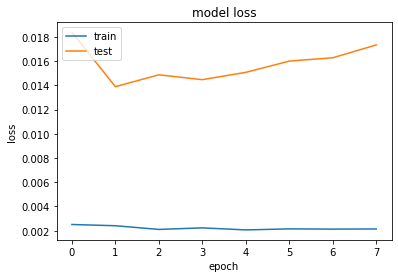

In [79]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Text(0.5, 1.0, 'Matrix for ANN Model')

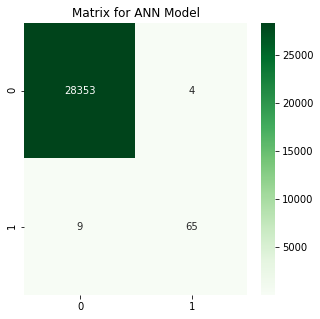

In [81]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, predict.round()),annot=True, ax=ax, fmt='g', cmap='Greens')
ax.set_title('Matrix for ANN Model')

In [82]:
print(metrics.classification_report(y_test,predict.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28357
           1       0.94      0.88      0.91        74

    accuracy                           1.00     28431
   macro avg       0.97      0.94      0.95     28431
weighted avg       1.00      1.00      1.00     28431

